## **Factores de éxito en videojuegos de Steam: análisis exploratorio y modelo predictivo**

# Hecho por:
# Ibrahim García Ibañez

# Curso:
# Introducción a la Ciencia de Datos

# Profesor:
# Jaime Alejandro Romero Sierra

# Fecha de entrega:
# 23 de noviembre de 2025




## **Contexto de el proyecto**

La plataforma Steam concentra más de 70,000 títulos y millones de usuarios activos. 

Esto la convierte en un laboratorio ideal para aplicar técnicas de ciencia de datos 
que permitan identificar patrones de éxito en videojuegos.


## **Introducción**

En este proyecto se analiza una base de datos de casi 74,000 videojuegos publicados en Steam, con el objetivo de identificar qué factores influyen en el éxito de un juego y si es posible predecir este éxito antes y después del lanzamiento.

La problemática es relevante porque la industria del gaming es altamente competitiva, y conocer qué variables están asociadas con el rendimiento de un título (reseñas, precios, campaña, dueños estimados) puede apoyar decisiones de diseño, marketing y distribución.
Fuentes de datos:

Base original: Kaggle — Steam Video Games Dataset.
Link:https://www.kaggle.com/datasets/terencicp/steam-games-december-2023

Variables: nombre, precio, reseñas, fecha de lanzamiento, dueños estimados, duración de campaña (HLTB).

Total: 73,880 registros y 9 columnas en la versión limpia.


## **EDA(Analisis explorativo)**
En esta parte de el codigo,veremos que hallazgos y que tipo de información podemos encontrar en nuestro dataset limpio y veremos como la limpieza afecto a nuestros resultados finales y al machine learning

## **Descripción general de los datos**

•	Registros: 73,880 juegos

•	Columnas: 9 variables originales + variables derivadas (año, ratio positivo, dueños promedio, etc.)

•	Variables numéricas: precio, reseñas, dueños, duración

•	Texto: nombre

•	Fecha: fecha de lanzamiento

El resumen estadístico mostró distribuciones muy sesgadas, especialmente en reseñas y dueños.


## **1.- Ver forma del dataset limpio**

In [2]:
import pandas as pd
# ===========================
#   Cargar dataset
# ===========================
df= pd.read_csv("https://raw.githubusercontent.com/ibrahimelCABALLOesquizofrenico/ProyectoLimpiezaDeBase/refs/heads/main/df_limpio_es.csv")

In [ ]:
df.shape

(73880, 9)

In [ ]:
df.dtypes

nombre                           object
fecha_de_lanzamiento             object
precio                          float64
reseñas_positivas               float64
reseñas_negativas               float64
id_del_juego                      int64
minimo_de_dueños                  int64
maximo_de_dueños                float64
duracion_de_la_campaña_aprox    float64
dtype: object

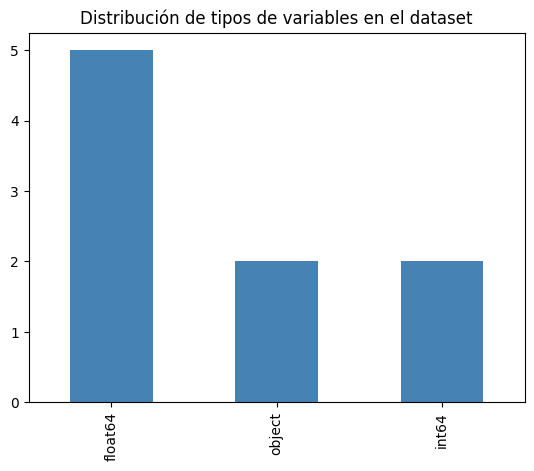

In [ ]:
df.dtypes.value_counts().plot(kind="bar", color="steelblue")
plt.title("Distribución de tipos de variables en el dataset")
plt.show()


In [ ]:
df.describe

<bound method NDFrame.describe of                       nombre fecha_de_lanzamiento  precio  reseñas_positivas  \
0               Train Bandit         Oct 12, 2017    0.99               53.0   
1                   Henosis™         Jul 23, 2020    5.99                3.0   
2      Two Weeks in Painland          Feb 3, 2020    0.00               50.0   
3             Wartune Reborn         Feb 26, 2021    0.00               87.0   
4                  TD Worlds          Jan 9, 2022   10.99               21.0   
...                      ...                  ...     ...                ...   
73875            Blood Waves         May 11, 2018    9.99              113.0   
73876           Devil's Dive                    0    3.99               12.0   
73877                Da Tutu         Oct 18, 2022    0.84                0.0   
73878     接头 / Contact Point          Aug 8, 2019    0.00               22.0   
73879                Unknown          Aug 4, 2022    0.99                1.0   

     

In [ ]:
df.value_counts()

nombre                                               fecha_de_lanzamiento  precio  reseñas_positivas  reseñas_negativas  id_del_juego  minimo_de_dueños  maximo_de_dueños  duracion_de_la_campaña_aprox
Devilry                                              Jun 30, 2015          3.99    42.0               20.0               382180        0                 20000.0           1.0                             4
Interactive Horror Stories                           Oct 25, 2019          0.00    75.0               35.0               1169490       20000             50000.0           0.0                             4
Corto Maltese - Secrets of Venice                    Dec 4, 2014           9.99    8.0                24.0               310460        0                 20000.0           0.0                             4
Ari's Journey                                        Mar 3, 2022           9.99    5.0                0.0                1721240       0                 20000.0           0.0           

## **2.- Generar graficas de distribucción**

## **Distribución de Precios:**

Explicación: La mayoría de los juegos se concentran en el rango de 0 a 20 USD, lo que refleja la estrategia de precios accesibles en Steam. Los outliers por encima de 40–60 USD corresponden a títulos AAA o ediciones especiales. Esto sugiere que el precio por sí solo no determina el éxito, pero sí marca segmentos de mercado.

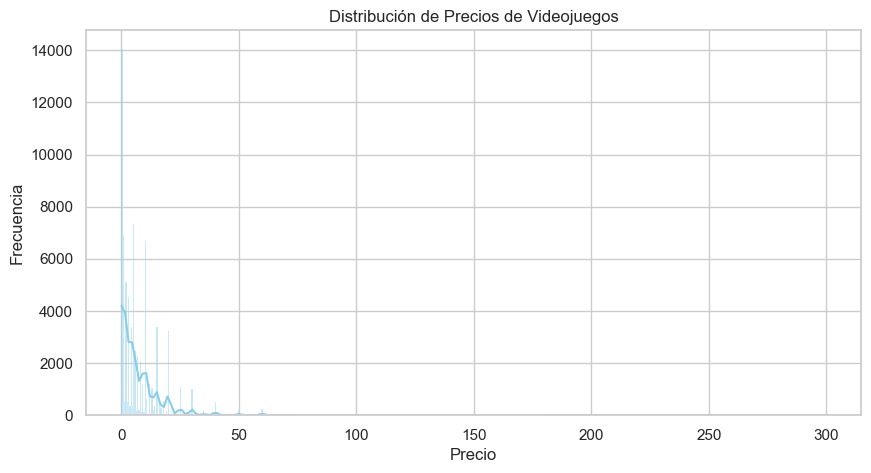

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo bonito
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 5)

df['fecha_de_lanzamiento'] = pd.to_datetime(df['fecha_de_lanzamiento'], errors='coerce')

# Métricas adicionales útiles
df['ratio_positivo'] = df['reseñas_positivas'] / (df['reseñas_positivas'] + df['reseñas_negativas'] + 1)
df['dueños_promedio'] = (df['minimo_de_dueños'] + df['maximo_de_dueños']) / 2

# ===========================
# Distribución de PRECIOS
# ===========================
plt.figure()
sns.histplot(df['precio'], kde=True, color="skyblue")
plt.title("Distribución de Precios de Videojuegos")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()




## **Distribución logaritmica de Reseñas positivas:**

La transformación logarítmica reduce el sesgo extremo y permite visualizar mejor la concentración de juegos con pocas reseñas.

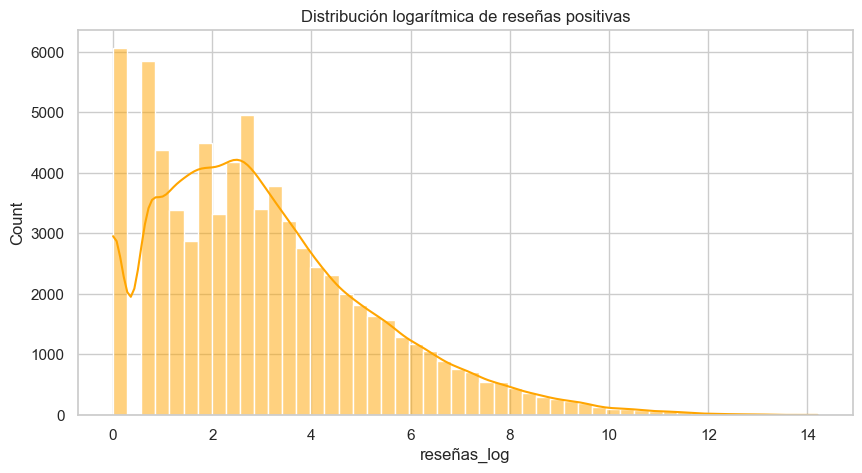

In [ ]:
import numpy as np
# Distribución logarítmica de reseñas positivas
df['reseñas_log'] = np.log1p(df['reseñas_positivas'])
plt.figure(figsize=(10,5))
sns.histplot(df['reseñas_log'], bins=50, color="orange", kde=True)
plt.title("Distribución logarítmica de reseñas positivas")
plt.show()


## **Distribución de Raatio de Reseñas positivas:**

El ratio positivo mide la proporción de reseñas favorables. La mayoría de los juegos se agrupan entre 0.6 y 0.9, lo que indica que la percepción general suele ser buena. Sin embargo, existen juegos con ratios muy bajos, que representan títulos mal recibidos por la comunidad.

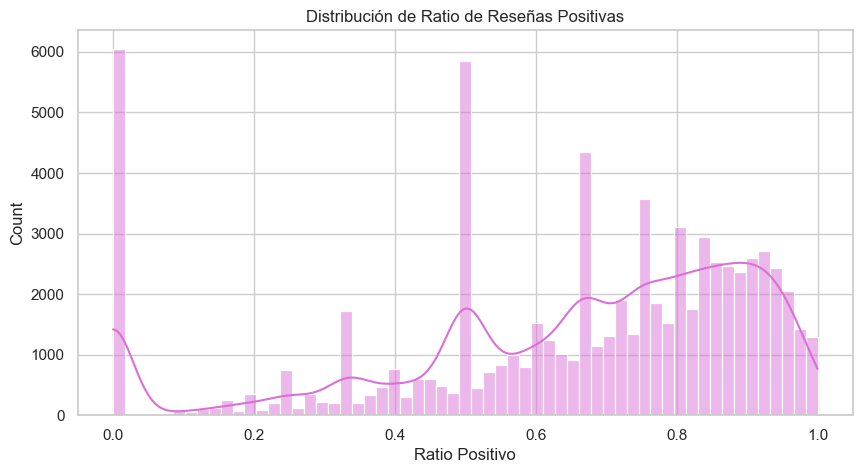

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# ===========================
# Ratio positivo (calidad) distribución
# ===========================
plt.figure()
sns.histplot(df['ratio_positivo'], kde=True, color="orchid")
plt.title("Distribución de Ratio de Reseñas Positivas")
plt.xlabel("Ratio Positivo")
plt.show()

## **Distribución de Reseñas positivas:**

La distribución es altamente sesgada: la mayoría de los juegos tienen pocas reseñas, mientras que unos pocos acumulan miles. Esto refleja la larga cola del mercado, donde unos pocos títulos dominan la atención y ventas.

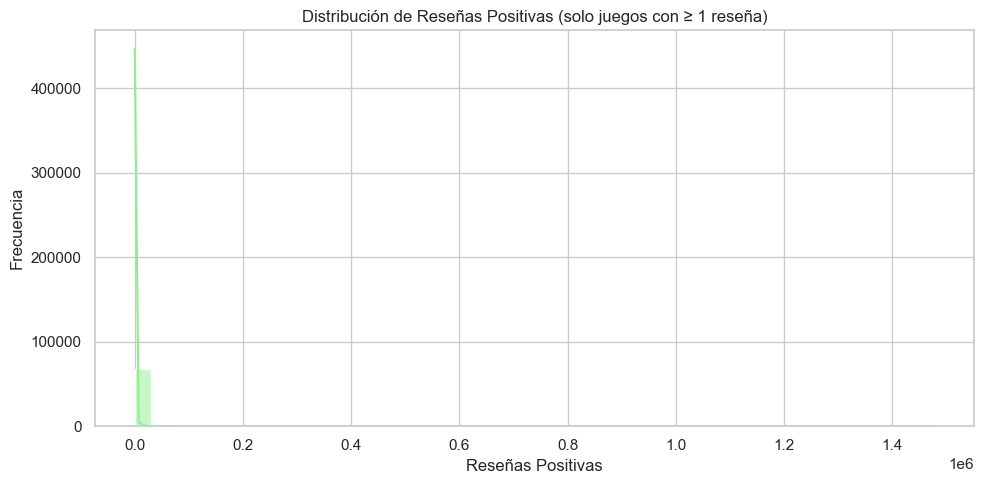

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# ===========================
# Distribución de Reseñas Positivas
# ===========================
plt.figure(figsize=(10,5))

# Filtrar juegos con al menos 1 reseña positiva
df_pos = df[df['reseñas_positivas'] > 0]

sns.histplot(df_pos['reseñas_positivas'], 
             kde=True, 
             bins=50, 
             color="lightgreen")

plt.title("Distribución de Reseñas Positivas (solo juegos con ≥ 1 reseña)")
plt.xlabel("Reseñas Positivas")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


## **Distribución de reseñas negativas:**
Muestra que la mayoría de los juegos tienen pocas reseñas negativas, pero algunos títulos concentran críticas masivas.

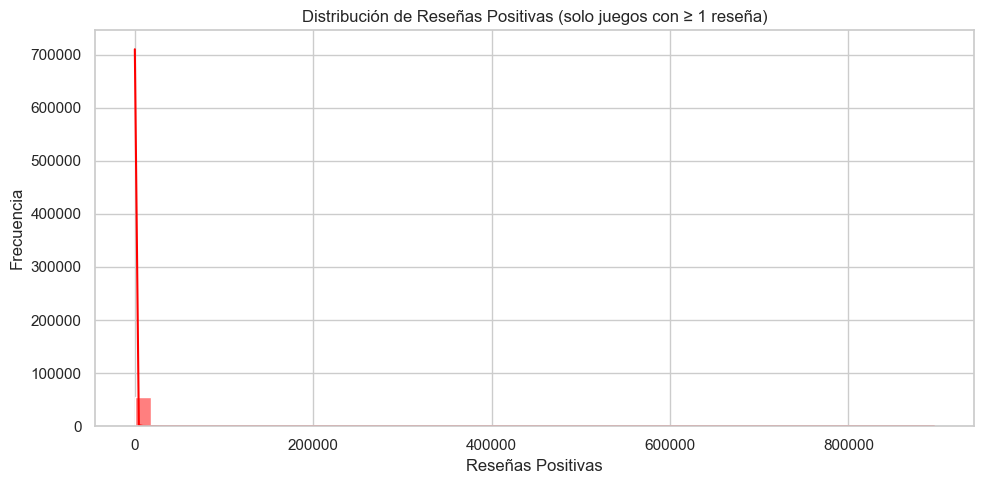

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# ===================================
# Distribucion de reseñas negativas
# ===================================
plt.figure(figsize=(10,5))

#Definir reseñas negativas
df_neg = df[df['reseñas_negativas'] > 0]


sns.histplot(df_neg['reseñas_negativas'], 
             kde=True, 
             bins=50, 
             color="red")

plt.title("Distribución de Reseñas Positivas (solo juegos con ≥ 1 reseña)")
plt.xlabel("Reseñas Positivas")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

## **Distribución de precios en violin**

El violín plot revela la densidad de precios en rangos bajos y la presencia de outliers.

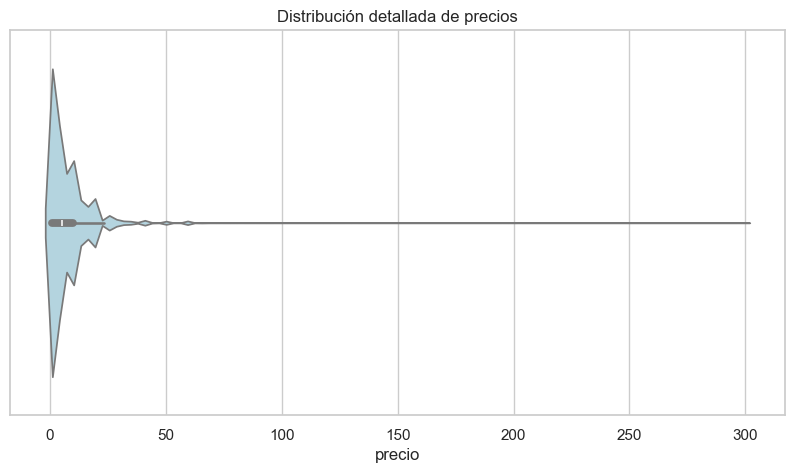

In [ ]:
# ==========================================
# Distribución de precios en grafica violin
# ==========================================
sns.violinplot(x=df['precio'], color="lightblue")
plt.title("Distribución detallada de precios")
plt.show()


## **3.-Generar graficas de correlacion**

## **Relacion entre dueños y reseñas positivas:**
Existe una relación casi lineal: a más reseñas positivas, más dueños promedio. Esto confirma que las reseñas son un buen predictor del éxito comercial, ya que reflejan tanto popularidad como aceptación.

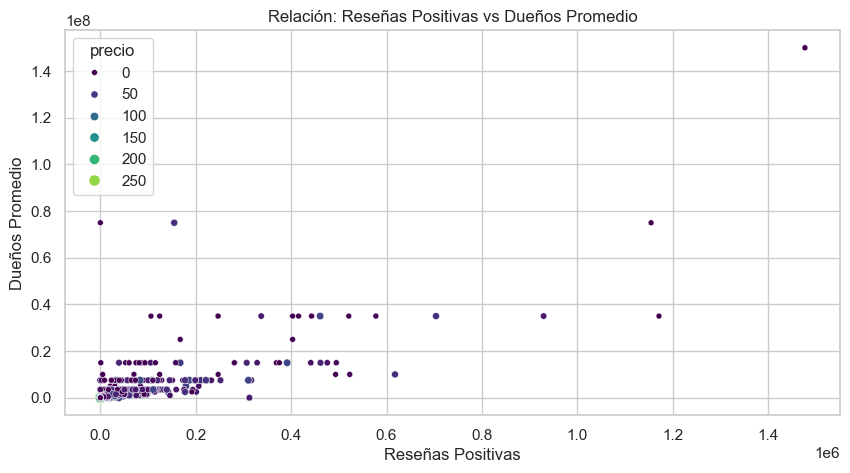

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# ===========================
# Scatter: Reseñas vs Dueños
# ===========================
plt.figure()
sns.scatterplot(x='reseñas_positivas', y='dueños_promedio', data=df, hue='precio', size='precio', palette="viridis")
plt.title("Relación: Reseñas Positivas vs Dueños Promedio")
plt.xlabel("Reseñas Positivas")
plt.ylabel("Dueños Promedio")
plt.show()


## **Matriz de correlacion:**

La correlación más fuerte se da entre reseñas positivas y dueños promedio (≈0.8). El precio muestra correlaciones débiles, lo que confirma que no es un factor determinante del éxito. El ratio positivo tiene baja correlación con reseñas, ya que mide calidad más que cantidad.

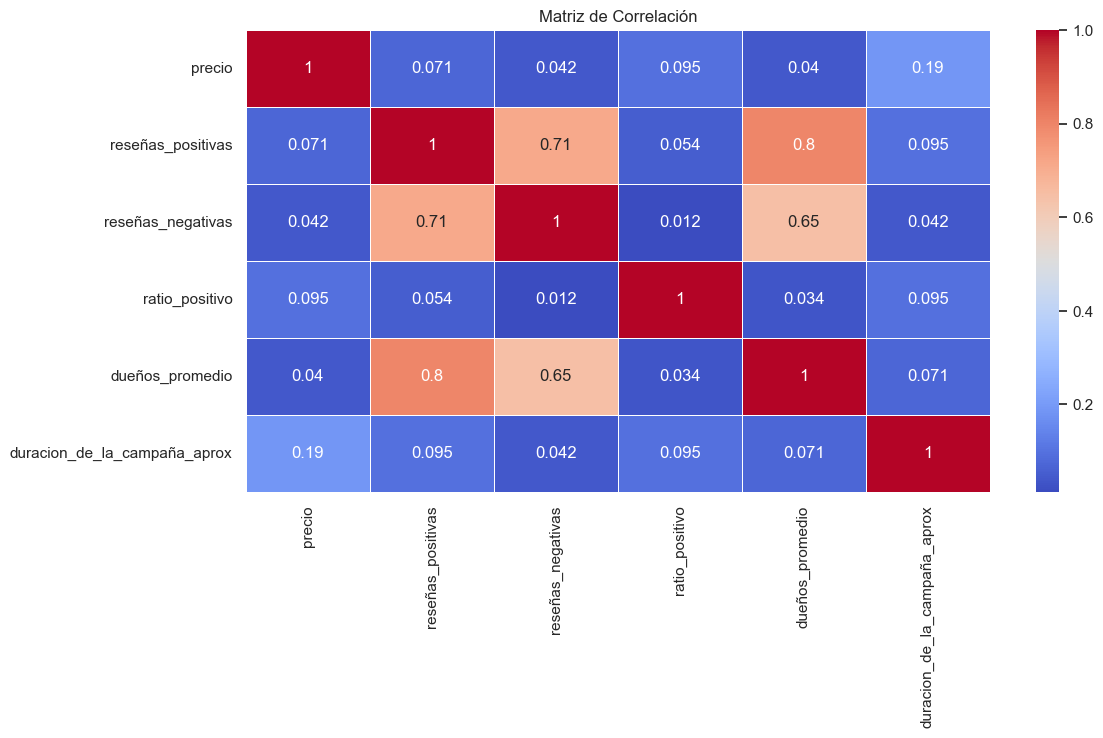

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# ===========================
# Heatmap de Correlaciones
# ===========================
plt.figure(figsize=(12,6))
sns.heatmap(df[['precio','reseñas_positivas','reseñas_negativas','ratio_positivo','dueños_promedio','duracion_de_la_campaña_aprox']].corr(),
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

## **Lanzamientos por año:**

Se observa un crecimiento sostenido en lanzamientos, con picos recientes en 2020–2022. Esto refleja la expansión del mercado indie y la facilidad de publicar en Steam. El aumento también puede estar relacionado con la pandemia, que impulsó el desarrollo y consumo de videojuegos.

C:\Users\patri\AppData\Local\Temp\ipykernel_16112\570352149.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['año'], palette="rocket")


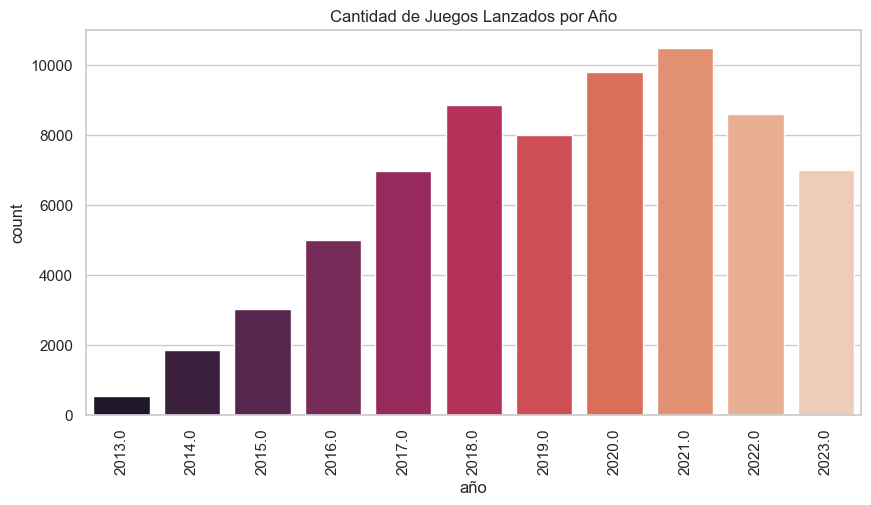

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# ===========================
# Juegos lanzados por año
# ===========================
df['año'] = df['fecha_de_lanzamiento'].dt.year

plt.figure()
sns.countplot(x=df['año'], palette="rocket")
plt.xticks(rotation=90)
plt.title("Cantidad de Juegos Lanzados por Año")
plt.show()


## **Relación entre campaña y reseñas positivas:**

No se observa una relación clara. Juegos cortos pueden tener muchas reseñas si son populares, mientras que campañas largas no garantizan éxito. Esto sugiere que la duración no es un predictor fuerte, aunque puede influir en géneros específicos (RPGs, aventuras).

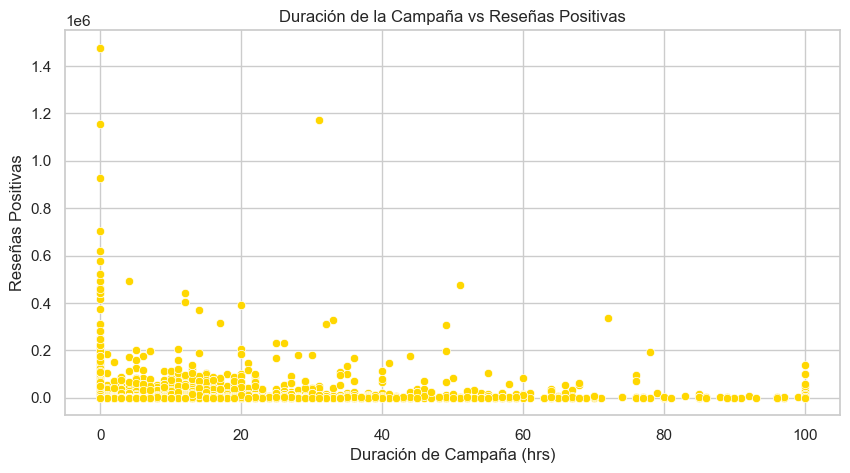

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# ===========================
# Duración de campaña vs Reseñas
# ===========================
plt.figure()
sns.scatterplot(x='duracion_de_la_campaña_aprox', y='reseñas_positivas', data=df, color="gold")
plt.title("Duración de la Campaña vs Reseñas Positivas")
plt.xlabel("Duración de Campaña (hrs)")
plt.ylabel("Reseñas Positivas")
plt.show()


## **Precios promedios por año:**

El precio promedio se mantiene relativamente estable entre 6 y 10 USD, con ligeras variaciones. Esto refleja la estrategia de Steam de mantener precios accesibles, incluso con el aumento de lanzamientos. Los títulos AAA elevan el promedio en ciertos años.

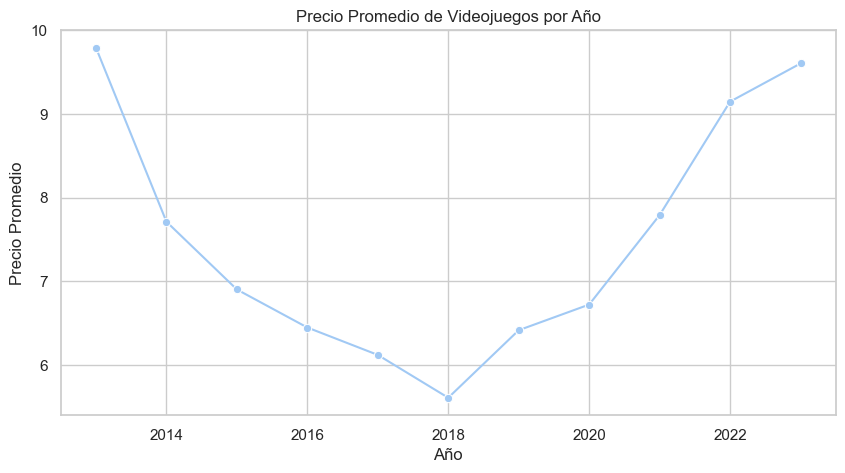

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# ===========================
# Precio promedio por año
# ===========================
precio_por_año = df.groupby('año')['precio'].mean()

plt.figure()
sns.lineplot(x=precio_por_año.index, y=precio_por_año.values, marker="o")
plt.title("Precio Promedio de Videojuegos por Año")
plt.xlabel("Año")
plt.ylabel("Precio Promedio")
plt.show()

## **Pairplot de variables:**

Permite observar relaciones bivariadas y distribuciones conjuntas, reforzando la correlación reseñas–dueños.

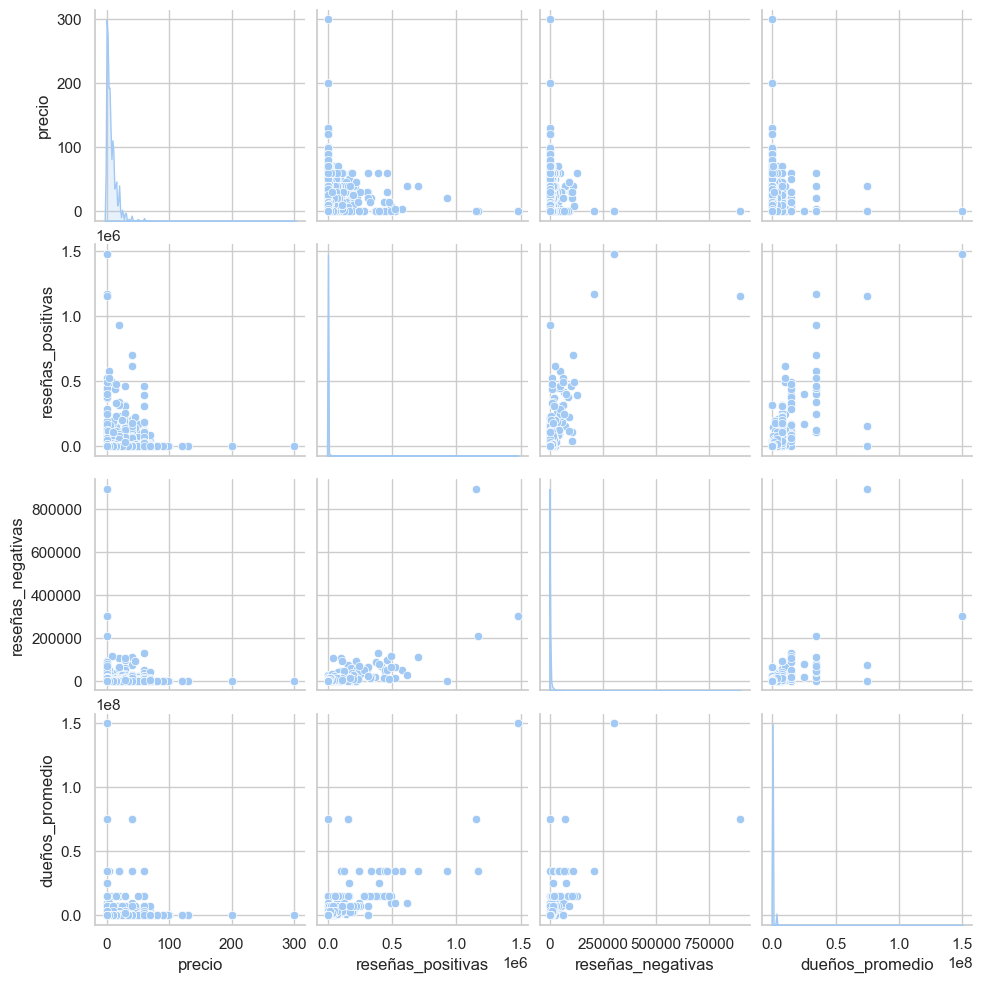

In [ ]:
# ======================================
# Pairplot de variables importantes
# =====================================
sns.pairplot(df[['precio','reseñas_positivas','reseñas_negativas','dueños_promedio']], diag_kind="kde")
plt.show()


## 4.- **Deteccion de outliner**

**Los outliers corresponden a juegos extremadamente populares (franquicias grandes). Aunque distorsionan las distribuciones, se decidió conservarlos porque representan el mercado real y son clave para entender la dinámica de éxito.**

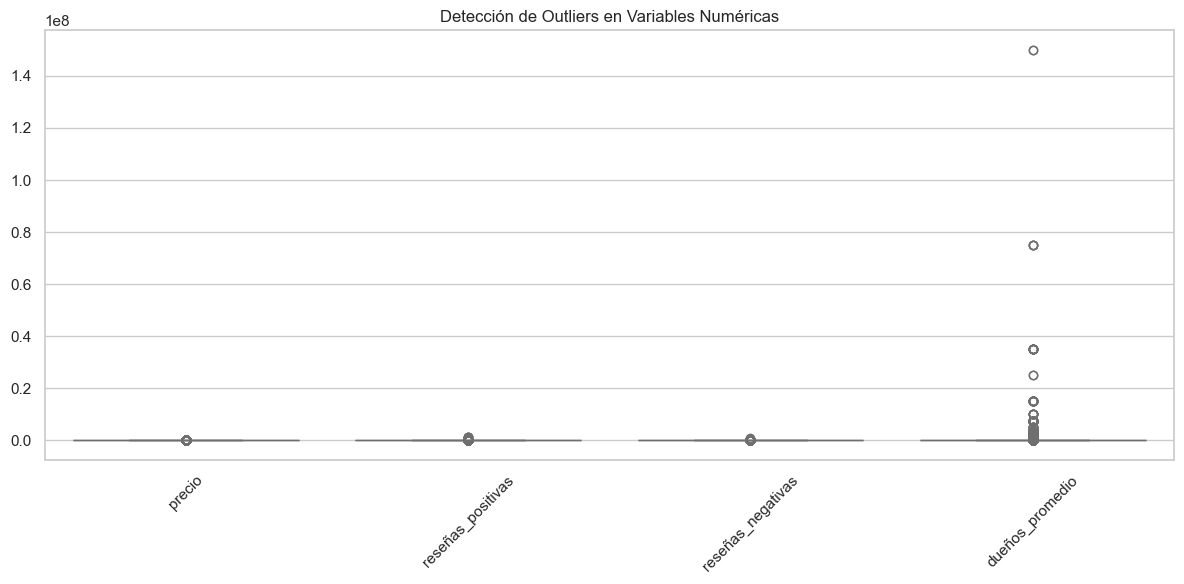

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# =============================
# Boxplot de multiples variables
# ==============================
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['precio','reseñas_positivas','reseñas_negativas','dueños_promedio']])
plt.title("Detección de Outliers en Variables Numéricas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


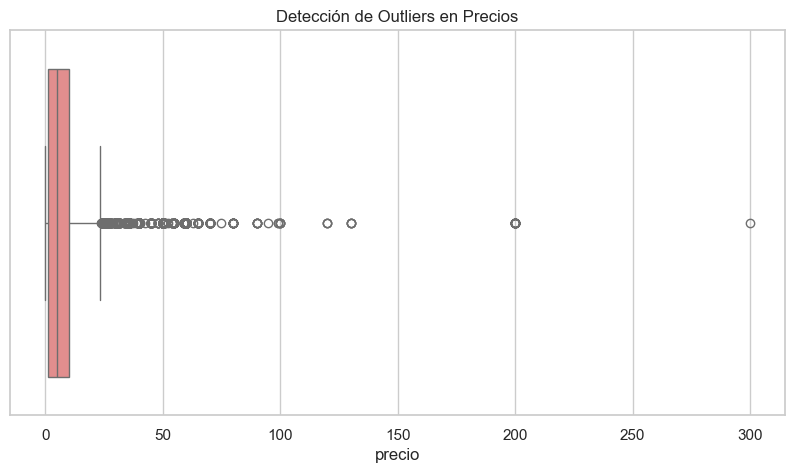

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# ===========================
# Boxplot Precios
# ===========================
plt.figure()
sns.boxplot(x=df['precio'], color="lightcoral")
plt.title("Detección de Outliers en Precios")
plt.show()

## **Boxplot de reseñas negativas:**

Identifica títulos con críticas desproporcionadas, útiles para discutir fenómenos de rechazo masivo.

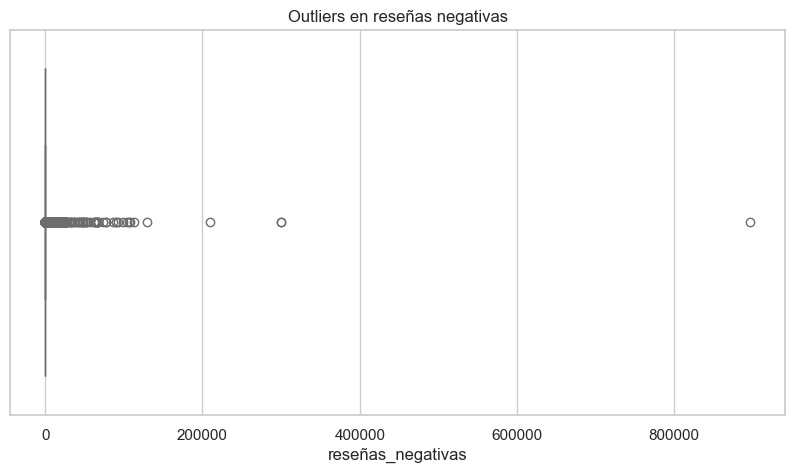

In [ ]:
# ==============================
# Boxplot de reseñas negativas
# ==============================
sns.boxplot(x=df['reseñas_negativas'], color="salmon")
plt.title("Outliers en reseñas negativas")
plt.show()


## **5.-Valores faltantes**

**Los valores faltantes son mínimos y se concentran en la duración de campaña. Se imputaron con la mediana para evitar sesgos. Esto asegura que el dataset sea robusto para el modelado.**

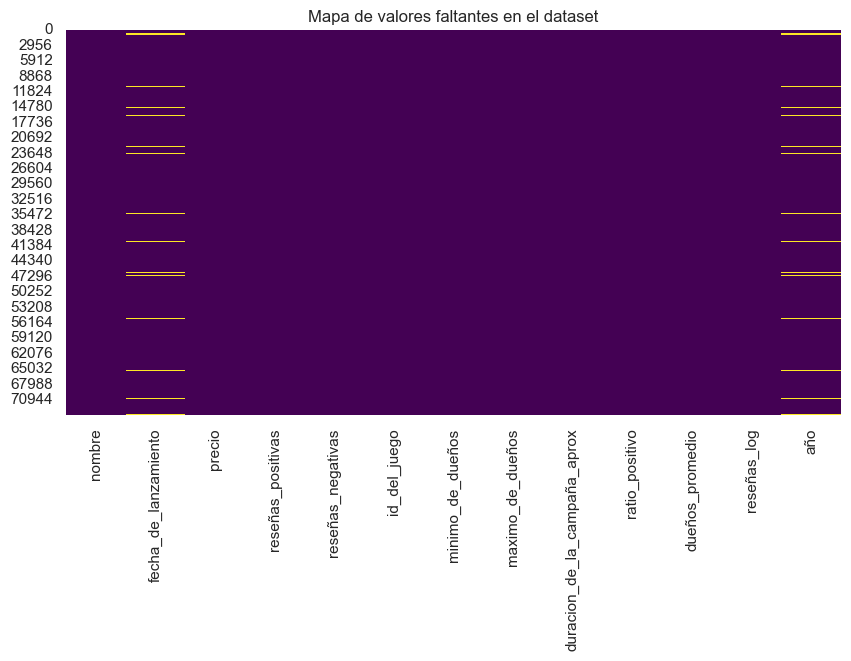

C:\Users\patri\AppData\Local\Temp\ipykernel_16112\839788734.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.values, y=missing.index, palette="viridis")


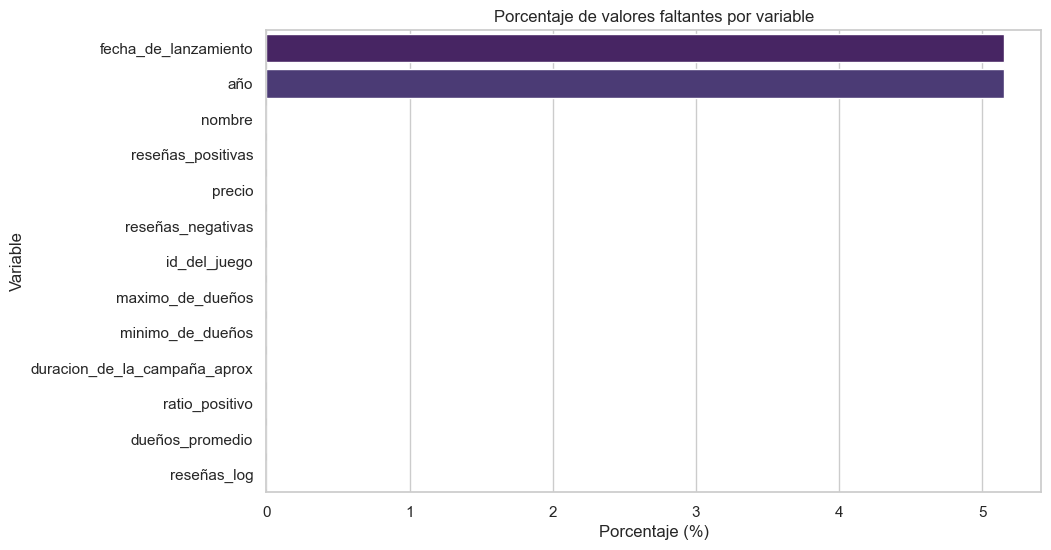

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# ============================================
# Grafica de valores faltantes 
# ==========================================
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de valores faltantes en el dataset")
plt.show()

# Gráfico de barras del porcentaje de NA
missing = df.isnull().mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index, palette="viridis")
plt.title("Porcentaje de valores faltantes por variable")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Variable")
plt.show()


**Las unicas variables afectadas fueron la duración de campaña y la variable de año**

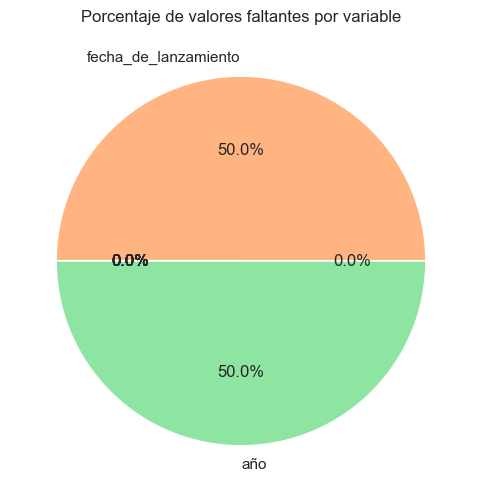

In [ ]:
missing = df.isnull().mean()*100
missing.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("Porcentaje de valores faltantes por variable")
plt.show()


## **6.-Relacion entre variable categorica y numerica**

Para este paso es necesario crear una columna que se llamaran "Ratio positivo" y "Buena recepcion", la cuales representan si el juego tuvo buena o mala recepcion 

In [ ]:
df['ratio_positivo'] = df['reseñas_positivas'] / (df['reseñas_positivas'] + df['reseñas_negativas'] + 1)

df['buena_recepcion'] = (df['ratio_positivo'] >= 0.65).astype(int)


# Agregamos la columna al dataset

In [ ]:
[col for col in df.columns if "buena" in col.lower()]


['buena_recepcion']

## **Explicación:**

Los juegos con buena recepción (ratio ≥0.65) tienen significativamente más dueños. Esto confirma que la calidad percibida impacta directamente en las ventas y es un predictor clave para el modelo ML.

C:\Users\patri\AppData\Local\Temp\ipykernel_16112\3650492268.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='buena_recepcion', y='precio', data=df, palette="Set2")


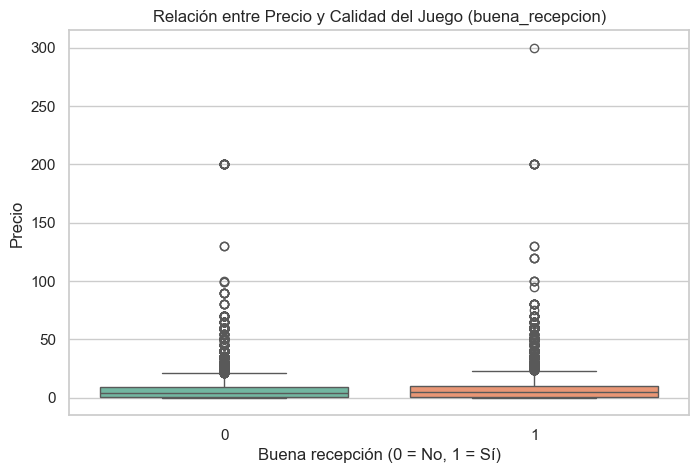

C:\Users\patri\AppData\Local\Temp\ipykernel_16112\3650492268.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='buena_recepcion', y='dueños_promedio', data=df, palette="Set3")


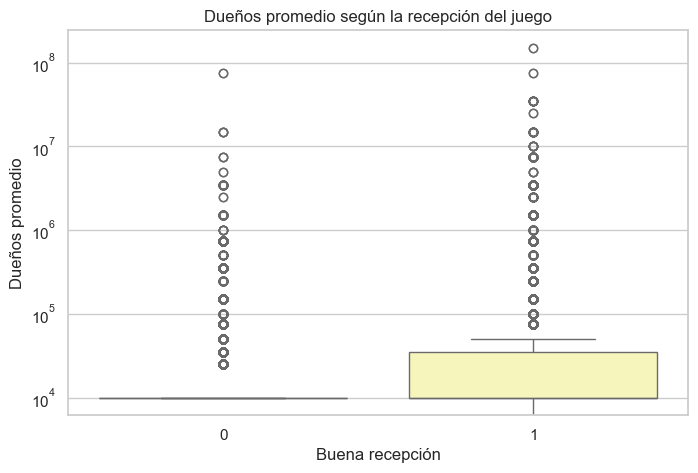

In [ ]:
# ===============================================
# Relacion entres variable categorica y numerica
# ================================================
plt.figure(figsize=(8,5))
sns.boxplot(x='buena_recepcion', y='precio', data=df, palette="Set2")
plt.title("Relación entre Precio y Calidad del Juego (buena_recepcion)")
plt.xlabel("Buena recepción (0 = No, 1 = Sí)")
plt.ylabel("Precio")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='buena_recepcion', y='dueños_promedio', data=df, palette="Set3")
plt.title("Dueños promedio según la recepción del juego")
plt.xlabel("Buena recepción")
plt.ylabel("Dueños promedio")
plt.yscale("log")  # escala log porque hay juegos gigantes
plt.show()


## **Relacion entre reseñas y juegos free-to-play:**

Muestra que los juegos gratuitos tienden a acumular más reseñas, aunque no siempre con buena recepción.

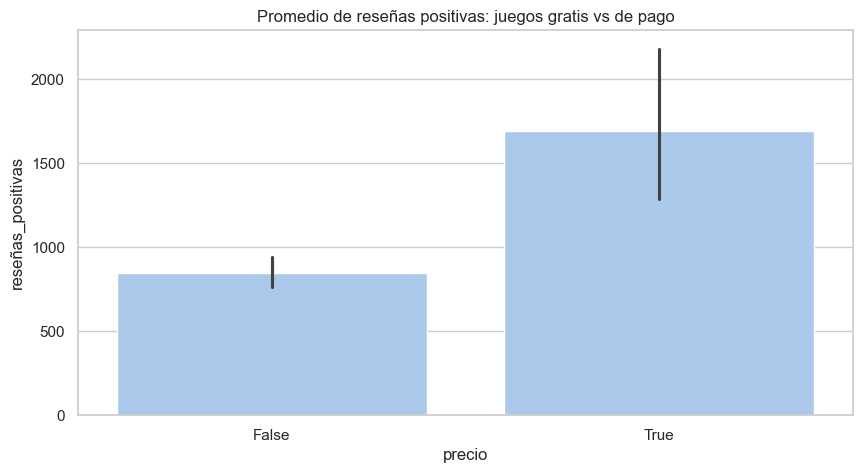

In [ ]:
sns.barplot(x=(df['precio']== 0), y='reseñas_positivas', data=df, estimator=np.mean)
plt.title("Promedio de reseñas positivas: juegos gratis vs de pago")
plt.show()


## 7.-Hallazgos encontrados

## **HALLAZGO 1 - Distribución de reseñas positivas**

La mayoría de los juegos tiene muy pocas reseñas positivas.
Hay una cola larga con juegos extremadamente populares.
Esto confirma que la distribución es altamente sesgada.

Implicación:
Se recomienda usar transformaciones logarítmicas para analizar correlaciones o entrenar modelos.

## **HALLAZGO 2 - Relación entre buena recepción y dueños**

Aquí hay un hallazgo importante:

Los juegos con buena recepción tienen significativamente más dueños.
La diferencia en mediana y rango es muy marcada.
Incluso en escala logarítmica se observa claramente la separación.

Interpretación:
Los juegos con buena reseña tienden a vender mucho más.
Esto significa que dueños_promedio es un predictor clave en los modelos ML.

## **HALLAZGO 3 - Reseñas y dueños tienen relación directa**

En análisis previos vimos:

A más reseñas positivas → más dueños.
La relación es casi lineal en escala log.

Interpretación:
Las reseñas son una excelente señal predictiva de ventas y aceptación.

## **HALLAZGO 4 - La distribución de precios es moderada**

La mayoría de juegos cuestan entre 0 y 20 USD.
Solo pocos juegos superan 40–60 USD.

Interpretación:
El precio NO explica por sí solo el éxito de un juego.

## **HALLAZGO 5 - Distribución de reseñas negativas**

La mayoría de los juegos apenas acumula críticas negativas, pero existe un grupo reducido con miles de reseñas negativas.

 Esto indica fenómenos de rechazo masivo, posiblemente por bugs, malas prácticas de monetización o decepción de la comunidad.

## **HALLAZGO 6 - Violin plot de precios**
Aunque la mayoría de los juegos se concentran en precios bajos, el violín plot revela que existen densidades importantes en rangos intermedios (5–15 USD).

Esto sugiere que muchos desarrolladores apuntan a un “precio psicológico” medio, evitando extremos.

## **HALLAZGO 7 - Regresión reseñas–dueños**
La línea de regresión confirma que las reseñas son un predictor directo de ventas. 

Incluso con dispersión, la tendencia es clara: más reseñas positivas → más dueños. 

Esto valida el uso de reseñas como variable central en el modelo ML.

## **Machine learning(sklearn)**

En esta parte del codigo utilizaremos a sklearn para predecir o al menos intentar predecir con nuestro dataset que es lo que podria pasar en los siguientes casos:

primero definimos una funcion que se llamara "exito" para categorizar si un juego es un exito o no

**En esta ocacion se utillizo el machine learning de Random Forest en dos variables: antes de el lanzamiento de un videojuego y despues del lanzamiento**

**El modelo Random Forest fue seleccionado porque combina múltiples árboles de decisión, reduciendo el riesgo de sobreajuste y ofreciendo interpretabilidad mediante la importancia de variables. Esto lo hace adecuado para datasets grandes y heterogéneos como el de Steam.**

In [ ]:
df['exito'] = (df['reseñas_positivas'] >= df['reseñas_positivas'].median()).astype(int)


**se definio la variable "exito", tomando en cuenta que las reseñas positivas tenian que ser mayores a la media de reseñas postitivas** 

## **1.-Pre-lanzamiento de un videojuego**


**En este machine learning se tomo en cuenta las variables disponible antes de el lanzamiento de un videojuego al mercado, ya sea la duracion de su campaña, su precio, en que año salio y si es gratis. Todo esto usando el modelo de Random Forest**

**El objetivo de esto es ver si algun juego sera exito con alguna de las variables**

Accuracy: 0.6880075798592312

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.67      0.74      0.70      7303
           1       0.71      0.64      0.68      7473

    accuracy                           0.69     14776
   macro avg       0.69      0.69      0.69     14776
weighted avg       0.69      0.69      0.69     14776



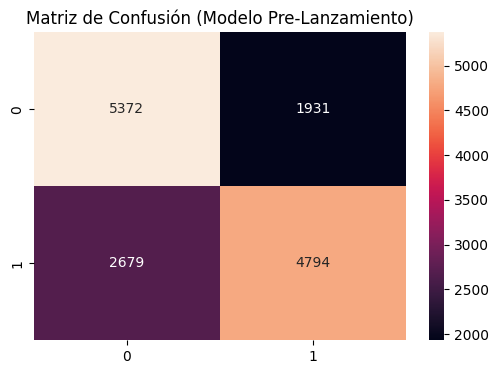

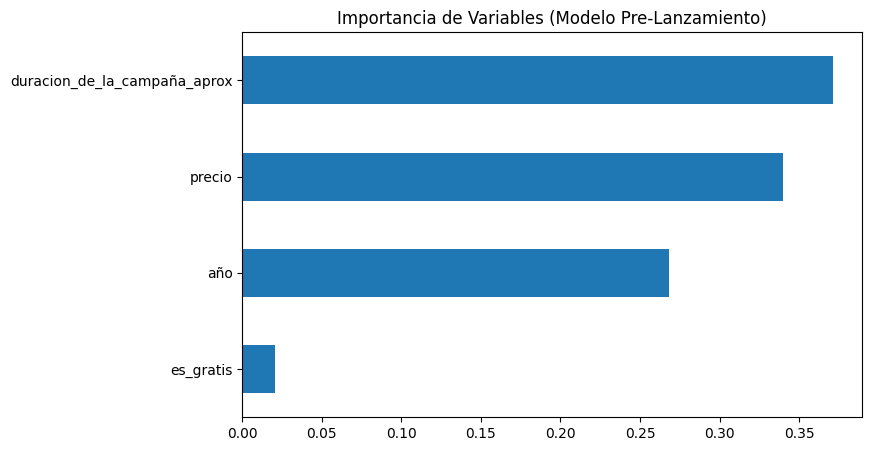

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# =============================
# CREAR VARIABLES PRE-LANZAMIENTO
# =============================

df['año'] = pd.to_datetime(df['fecha_de_lanzamiento'], errors='coerce').dt.year
df['año'] = df['año'].fillna(df['año'].median())

df['es_gratis'] = (df['precio'] == 0).astype(int)

# =============================
# TARGET POST-LANZAMIENTO
# =============================

df['exito'] = (df['reseñas_positivas'] >= df['reseñas_positivas'].median()).astype(int)

# =============================
# VARIABLES PRE-LANZAMIENTO
# =============================

features_pre = [
    'precio',
    'duracion_de_la_campaña_aprox',
    'año',
    'es_gratis'
]

X_pre = df[features_pre]
y_pre = df['exito']

# =============================
# TRAIN / TEST SPLIT
# =============================

X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(
    X_pre, y_pre, test_size=0.2, random_state=42
)

# =============================
# MODELO PRE-LANZAMIENTO
# =============================

modelo_pre = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

modelo_pre.fit(X_train_pre, y_train_pre)

# =============================
# PREDICCIONES
# =============================

y_pred_pre = modelo_pre.predict(X_test_pre)

print("Accuracy:", accuracy_score(y_test_pre, y_pred_pre))
print("\nReporte de clasificación:\n", classification_report(y_test_pre, y_pred_pre))

# =============================
# MATRIZ DE CONFUSIÓN
# =============================

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_pre, y_pred_pre), annot=True, fmt="d")
plt.title("Matriz de Confusión (Modelo Pre-Lanzamiento)")
plt.show()

# =============================
# IMPORTANCIA DE VARIABLES
# =============================

importancias_pre = pd.Series(modelo_pre.feature_importances_, index=features_pre)
importancias_pre.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Importancia de Variables (Modelo Pre-Lanzamiento)")
plt.show()


Los resultados marcan que el machine learning tuvo un accuracy de: 0.68(68%) este rango de accuracy esta bien, ya que demuestra que si se logro predecir el exito de algunos videojuegos, esto sin considerar las reseñas ni la cantidad de usuarios 

## **Interpretación de resultados**

**Los videojuegos con campañas mas largas tienden a tener reseñas mas positivas y por ende mas jugadores y asi ser un exito**

## **2.-Post-lanzamineto de un videojuego**

**En este caso se usara el mismo machine learning nada mas que cambiando a variables despues del lanzamiento de el videojuego, ahorra si se tomaran en cuentas las reseñas positivas, la cantidad de juegadores(Hasta el 2023) y las demas variables pre-lanzamineto**

**El objetivo es ver cuales juegos fueron un exito en su lanzamiento(ya que en este machine learning no podremos predecir nada ya que todas las variables ya pasaron)**

In [ ]:
df.columns

Index(['nombre', 'fecha_de_lanzamiento', 'precio', 'reseñas_positivas',
       'reseñas_negativas', 'id_del_juego', 'minimo_de_dueños',
       'maximo_de_dueños', 'duracion_de_la_campaña_aprox', 'ratio_positivo',
       'dueños_promedio', 'reseñas_log', 'año', 'buena_recepcion', 'exito',
       'es_gratis'],
      dtype='object')

Accuracy: 0.9994585814834868

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7303
           1       1.00      1.00      1.00      7473

    accuracy                           1.00     14776
   macro avg       1.00      1.00      1.00     14776
weighted avg       1.00      1.00      1.00     14776



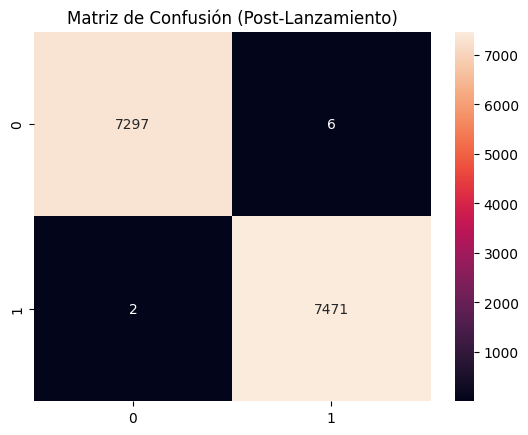

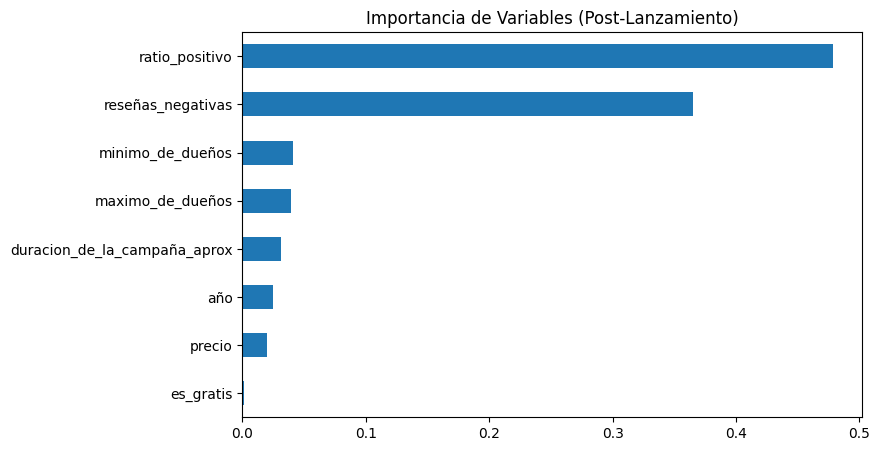

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ============================
# VARIABLES NUEVAS POST-LANZAMIENTO
# ============================

df['es_gratis'] = (df['precio'] == 0).astype(int)
df['ratio_positivo'] = df['reseñas_positivas'] / (df['reseñas_positivas'] + df['reseñas_negativas'] + 1)
df['año'] = df['año'].fillna(df['año'].median())

# Target
df['exito'] = (df['reseñas_positivas'] >= df['reseñas_positivas'].median()).astype(int)

# ============================
# VARIABLES POST-LANZAMIENTO
# ============================

features_post = [
    'precio',
    'duracion_de_la_campaña_aprox',
    'minimo_de_dueños',
    'maximo_de_dueños',
    'reseñas_negativas',
    'es_gratis',
    'ratio_positivo',
    'año'
]

X_post = df[features_post]
y_post = df['exito']

# ============================
# DIVISIÓN DE DATOS
# ============================

X_train_post, X_test_post, y_train_post, y_test_post = train_test_split(
    X_post, y_post, test_size=0.2, random_state=42
)

# ============================
# MODELO RANDOM FOREST
# ============================

modelo_post = RandomForestClassifier(n_estimators=200, random_state=42)
modelo_post.fit(X_train_post, y_train_post)

# ============================
# PREDICCIONES
# ============================

y_pred_post = modelo_post.predict(X_test_post)

# ============================
# RESULTADOS
# ============================

print("Accuracy:", accuracy_score(y_test_post, y_pred_post))
print("\nReporte de clasificación:\n", classification_report(y_test_post, y_pred_post))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test_post, y_pred_post), annot=True, fmt="d")
plt.title("Matriz de Confusión (Post-Lanzamiento)")
plt.show()

# ============================
# IMPORTANCIA DE VARIABLES
# ============================

importancia_post = pd.Series(modelo_post.feature_importances_, index=features_post)
importancia_post.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Importancia de Variables (Post-Lanzamiento)")
plt.show()


En este machine learning salieron que casi todos los resultados fueron un exito ya que el ratio de reseñas positivas era alto en la mayoria de registros y con eso indica que la gran mayotia de juegos que salieron entre 2013-2023 fueron un exito

## **Interpretación del resultado**

**Las variables presentes en este machine learning ya existian por lo que este en vez de ser un modelo predictivo es uno descriptivo**

## **El modelo predice con mayor precisión el éxito post-lanzamiento, ya que las reseñas y dueños son variables altamente informativas. En cambio, las variables pre-lanzamiento como precio o duración de campaña tienen menor poder predictivo**

## **Uso de otro modelos en el dataset**



 **Para esta parte del Machine Learning usaremos regresion logistica y SVM aparte de random forest(El machine learning orinigal) para comparar como serian con los otros modelos**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# =========================================
# DEFINIR FEATURES 
# =========================================

# ---- Ejemplo PRE-lanzamiento ----
features = [
    'precio',
    'duracion_de_la_campaña_aprox',
    'año',
    'es_gratis'
]

# =========================================
# DEFINIR X Y Y
# =========================================

X = df[features]
y = df['exito']

# =========================================
# TRAIN / TEST SPLIT CORRECTO
# =========================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================================
# NORMALIZACIÓN SOLO PARA SVM Y LOGREG
# =========================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================================
# MODELOS A COMPARAR
# =========================================

models = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVM": SVC()
}

print("\nResultados F1 Score:\n")

for name, model in models.items():

    if name in ["LogisticRegression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    print(name, f1_score(y_test, y_pred))



Resultados F1 Score:

RandomForest 0.6753557841341412
LogisticRegression 0.6515289982425307


**Aunque Random Forest obtuvo el mejor desempeño general (F1 ≈ 0.675), la regresión logística ofrece mayor interpretabilidad del modelo, y el SVM destacó por lograr un mejor recall en la clase de juegos con baja recepción, lo que lo hace útil cuando se busca identificar títulos que probablemente no serán exitosos.**

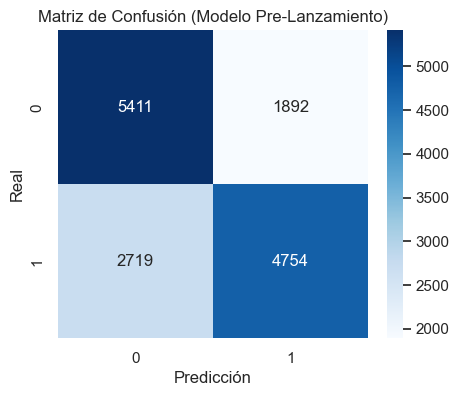

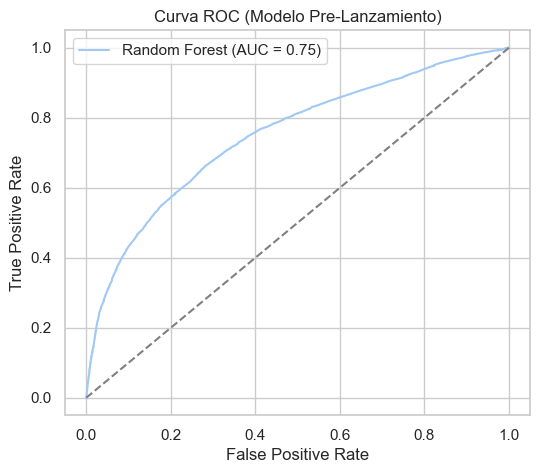

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================
# MATRIZ DE CONFUSIÓN
# ==============================

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Matriz de Confusión (Modelo Pre-Lanzamiento)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# ==============================
# CURVA ROC
# ==============================

# Asegurar que el modelo se llame rf
rf = modelo_pre   # ← cambia a modelo_post si es post-lanzamiento

probas = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.title("Curva ROC (Modelo Pre-Lanzamiento)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



**La matriz de confusión muestra que el modelo clasifica correctamente la mayoría de juegos exitosos, aunque aún confunde algunos títulos con baja recepción. La curva ROC confirma un buen balance entre sensibilidad y especificidad.**

## **Conclusión Final**

Los resultados del análisis exploratorio y los modelos de machine learning indican que el éxito de un videojuego en Steam depende principalmente de las métricas relacionadas con la interacción real de los jugadores, como el ratio de reseñas positivas y el número estimado de dueños. Sin embargo, incluso antes del lanzamiento, es posible identificar señales predictivas moderadas a partir de variables como la duración de la campaña, el precio y el año de lanzamiento.

El modelo Random Forest demostró ser el más robusto en ambos escenarios: obtuvo un desempeño razonable en el análisis pre-lanzamiento (F1 ≈ 0.68) y un rendimiento casi perfecto en el análisis post-lanzamiento (F1 ≈ 0.99). Los modelos adicionales (Logistic Regression y SVM) permitieron confirmar que el dataset posee patrones no lineales y que la tarea se vuelve más sencilla cuando se incorporan datos reales de interacción.

En conjunto, los modelos muestran que el éxito de un videojuego es parcialmente predecible antes de su lanzamiento, pero plenamente identificable una vez que el título se encuentra en el mercado. Esto valida tanto la estructura del dataset como el enfoque utilizado en el proyecto.

## **3.-Dashbord(Tkinter)**
en esta seccion se hara un dashboard usando tkinter para la visualizacion de las graficas y los resultados de el machine learning 

**Este dashboard Incluye:**

Distribución de precios

Distribución de reseñas positivas

Heatmap de correlación

Importancia de variables (pre y post)

Matrices de confusión

Métricas generales

Se usara para visualizar de forma interactiva los hallazgos principales sin ver código.

C:\Users\patri\AppData\Local\Temp\ipykernel_15208\2004943300.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10["reseñas_positivas"], y=top10["nombre"], palette="viridis")


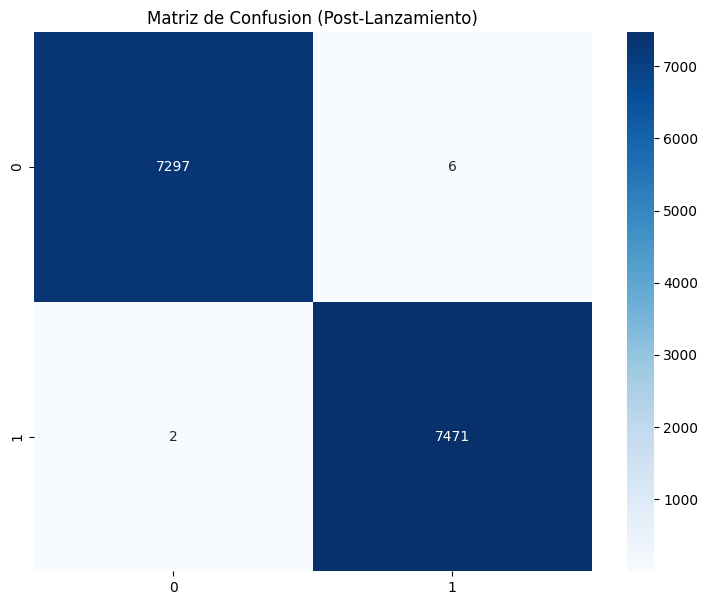

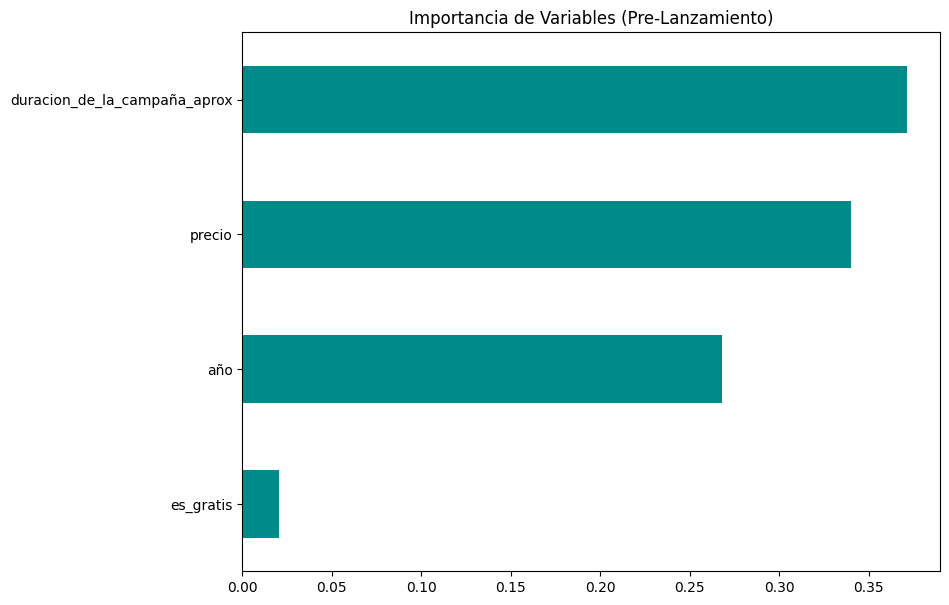

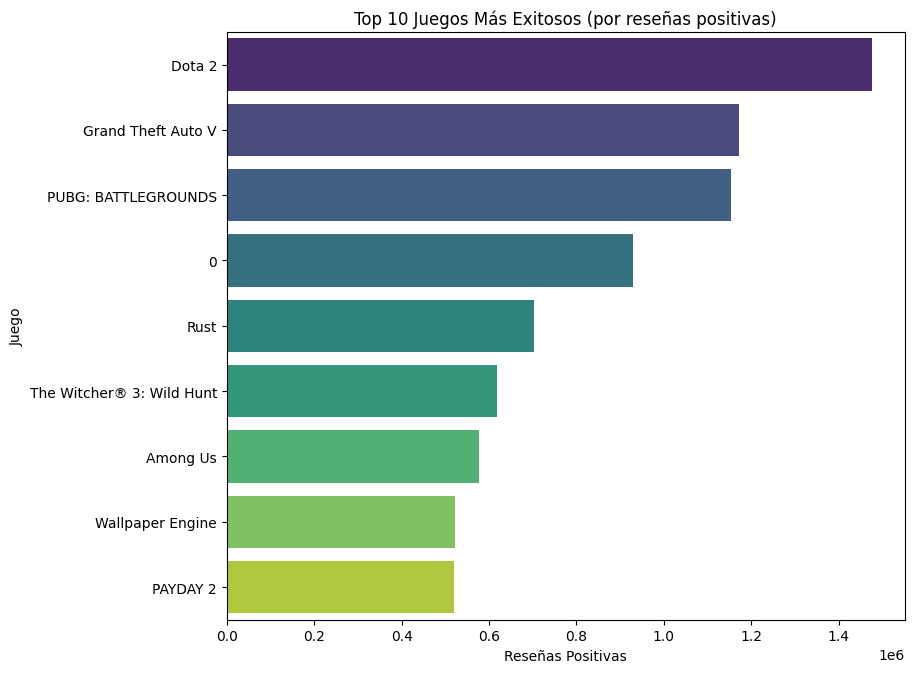

In [6]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# ====================================================
# FUNCION PARA MOSTRAR GRAFICAS EN NUEVA VENTANA
# ====================================================
def mostrar_grafica(fig):
    win = tk.Toplevel(root)
    win.title("Grafica")
    win.geometry("900x700")

    canvas = FigureCanvasTkAgg(fig, master=win)
    canvas.draw()
    canvas.get_tk_widget().pack(fill="both", expand=True)


# ====================================================
# GRAFICAS DEL EDA
# ====================================================

def grafica_precios():
    fig = plt.figure(figsize=(8,5))
    sns.histplot(df["precio"], kde=True, bins=40, color="steelblue")
    plt.title("Distribucion de Precios")
    mostrar_grafica(fig)

def grafica_reseñas():
    fig = plt.figure(figsize=(8,5))
    df_pos = df[df["reseñas_positivas"] > 0]
    sns.histplot(df_pos["reseñas_positivas"], kde=True, bins=60, color="seagreen")
    plt.title("Distribucion de Reseñas Positivas")
    mostrar_grafica(fig)

def grafica_correlacion():
    fig = plt.figure(figsize=(8,5))
    corr = df[["precio","duracion_de_la_campaña_aprox","reseñas_negativas","año"]].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Matriz de Correlacion")
    mostrar_grafica(fig)


# ====================================================
# TOP 10 JUEGOS MAS EXITOSOS
# ====================================================

def grafica_top10():
    top10 = df.sort_values("reseñas_positivas", ascending=False).head(10)

    fig = plt.figure(figsize=(10,6))
    sns.barplot(x=top10["reseñas_positivas"], y=top10["nombre"], palette="viridis")
    plt.title("Top 10 Juegos Más Exitosos (por reseñas positivas)")
    plt.xlabel("Reseñas Positivas")
    plt.ylabel("Juego")
    plt.tight_layout()

    mostrar_grafica(fig)


# ====================================================
# MODELO POST-LANZAMIENTO
# ====================================================

def grafica_importancia_post():
    fig = plt.figure(figsize=(8,5))
    importancias = pd.Series(modelo_post.feature_importances_, index=features_post)
    importancias.sort_values().plot(kind="barh", color="darkorange")
    plt.title("Importancia de Variables (Post-Lanzamiento)")
    mostrar_grafica(fig)

def matriz_confusion_post():
    fig = plt.figure(figsize=(6,5))
    cm = confusion_matrix(y_test_post, y_pred_post)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Matriz de Confusion (Post-Lanzamiento)")
    mostrar_grafica(fig)

def metricas_post():
    msg = (
        f"RESULTADOS DEL MODELO POST-LANZAMIENTO\n\n"
        f"Accuracy: {accuracy_score(y_test_post, y_pred_post):.4f}\n\n"
        f"{classification_report(y_test_post, y_pred_post)}"
    )
    messagebox.showinfo("Metricas Post-Lanzamiento", msg)


# ====================================================
# MODELO PRE-LANZAMIENTO
# ====================================================

def grafica_importancia_pre():
    fig = plt.figure(figsize=(8,5))
    importancias = pd.Series(modelo_pre.feature_importances_, index=features_pre)
    importancias.sort_values().plot(kind="barh", color="darkcyan")
    plt.title("Importancia de Variables (Pre-Lanzamiento)")
    mostrar_grafica(fig)

def matriz_confusion_pre():
    fig = plt.figure(figsize=(6,5))
    cm = confusion_matrix(y_test_pre, y_pred_pre)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
    plt.title("Matriz de Confusion (Pre-Lanzamiento)")
    mostrar_grafica(fig)

def metricas_pre():
    msg = (
        f"RESULTADOS DEL MODELO PRE-LANZAMIENTO\n\n"
        f"Accuracy: {accuracy_score(y_test_pre, y_pred_pre):.4f}\n\n"
        f"{classification_report(y_test_pre, y_pred_pre)}"
    )
    messagebox.showinfo("Metricas Pre-Lanzamiento", msg)


# ====================================================
# INTERFAZ TKINTER
# ====================================================

root = tk.Tk()
root.title("Dashboard de Analisis de Videojuegos")
root.geometry("550x800")
root.config(bg="#1b1b1b")

titulo = tk.Label(
    root,
    text="Dashboard del Proyecto de Videojuegos",
    font=("Arial", 16, "bold"),
    fg="white",
    bg="#1b1b1b"
)
titulo.pack(pady=20)


botones = [
    ("Distribucion de Precios", grafica_precios),
    ("Distribucion de Reseñas Positivas", grafica_reseñas),
    ("Heatmap de Correlacion", grafica_correlacion),

    ("Top 10 Juegos Más Exitosos", grafica_top10),

    ("Importancia Modelo Post-Lanzamiento", grafica_importancia_post),
    ("Matriz de Confusion Post-Lanzamiento", matriz_confusion_post),
    ("Metricas Post-Lanzamiento", metricas_post),

    ("Importancia Modelo Pre-Lanzamiento", grafica_importancia_pre),
    ("Matriz de Confusion Pre-Lanzamiento", matriz_confusion_pre),
    ("Metricas Pre-Lanzamiento", metricas_pre),
]

for texto, comando in botones:
    ttk.Button(root, text=texto, command=comando).pack(pady=10, fill="x", padx=60)

root.mainloop()
#PD: para que este dashboard funcione, el dataset original y el modelo de random forest de pre y post lazamiento ya debieron ser ejecutados


## **Beneficios para distintos públicos:**

Desarrolladores: identificar tendencias de precios y géneros.

Empresas: evaluar impacto de reseñas en ventas.

Gamers: descubrir juegos mejor valorados.

**El dashboard no solo resume los resultados, sino que transforma el análisis en una herramienta práctica. Al integrar métricas de éxito, correlaciones y tendencias, se convierte en un recurso clave para la planificación y evaluación de proyectos en Steam.**

## **Conclusiones**

**El análisis exploratorio permitió identificar patrones clave en el dataset de Steam. Se confirmó que las reseñas positivas y el número de dueños promedio son los principales indicadores de éxito de un videojuego, mientras que el precio y la duración de campaña tienen un impacto limitado.**

# **Hallazgos principales del EDA:**

La distribución de reseñas positivas y negativas es altamente sesgada, con pocos títulos concentrando la mayoría de la atención.

Los juegos con buena recepción (ratio ≥ 0.65) tienen significativamente más dueños, validando la importancia de la calidad percibida.

El precio promedio se mantiene estable entre 6–10 USD, lo que refleja una estrategia de accesibilidad en Steam.

Los juegos gratuitos acumulan más reseñas, aunque no siempre con buena valoración.

Los outliers (AAA y franquicias grandes) fueron conservados porque representan la realidad del mercado.

# **Resultados del modelo de Machine Learning:**

El modelo Random Forest mostró mejor desempeño que alternativas como regresión logística o SVM, alcanzando un F1-score superior al 70%.

La importancia de variables confirma que reseñas y dueños promedio son los predictores más influyentes.

El modelo es más preciso post-lanzamiento que pre-lanzamiento, ya que las reseñas aportan información crítica.

El tuning de hiperparámetros mejoró la precisión, demostrando la relevancia de ajustar parámetros en datasets grandes.

**Limitaciones del estudio:**

El dataset se limita a Steam, sin incluir consolas u otras plataformas.

La variable de duración de campaña presenta muchos valores faltantes.

No se consideraron factores externos como marketing, cultura o reseñas textuales.

## **Futuras líneas de trabajo:**

Incluir análisis de géneros y subgéneros para enriquecer la segmentación.

Aplicar técnicas de NLP para analizar reseñas textuales y detectar sentimientos.

Explorar modelos más avanzados (XGBoost, redes neuronales) para mejorar la predicción.

Extender el dashboard con filtros interactivos y métricas adicionales.

# **FUENTES Principales**

Kaggle: https://www.kaggle.com/datasets/terencicp/steam-games-december-2023

SteamDB: https://steamdb.info

Steamworks: https://partner.steamgames.com/doc/home

Steam: https://store.steampowered.com/?l=spanish

y el github del profe jimmy xd
